### **The K-Furthest Neighbors (KFN) Algorithm**
*K-Furthest Neighbors (KFN) is the inverse of K-Nearest Neighbors (KNN), designed to find the most orthogonally distant points in a dataset, maximizing dissimilarity rather than similarity.*

---

## **🔹 Definition**
**Given a dataset** \( D \) **with N data points in a high-dimensional space**, the **K-Furthest Neighbors (KFN) algorithm** finds the \( k \) most distant points from a given query point \( q \), based on a chosen distance metric (typically cosine distance or Euclidean distance).

Instead of **identifying the closest neighbors** like KNN, KFN selects the **data points that are furthest away**, ensuring **maximum separation in vector space**.

---

## **🔹 How K-Furthest Neighbors (KFN) Works**
1. **Compute Distances**  
   - Given a query point \( q \), compute the **distance to all other points** in the dataset \( D \).
   - Use a metric such as:
     - **Cosine Distance** (for high-dimensional embeddings)
     - **Euclidean Distance** (for structured data)
     - **Mahalanobis Distance** (for feature-space variation)
   
2. **Sort by Maximum Distance**  
   - Rank all points by **descending** distance from \( q \).
   - Unlike KNN, which selects the smallest distances, **KFN selects the largest distances**.

3. **Return the K-Furthest Neighbors**  
   - Extract the **top \( k \) most distant points**, forming a **counter-dataset** that captures the most diverse and extreme points relative to \( q \).

---

## **🔹 Why KFN Matters**
✅ **Data Expansion:** It automatically generates **counter-examples** for any dataset.  
✅ **Contrastive Learning:** It enhances machine learning models by forcing **maximum separation** in embeddings.  
✅ **Anomaly Detection:** Instead of finding clusters, it identifies **outliers and extremes**.  
✅ **Dimensional Space Analysis:** It helps explore the **true shape of data in high dimensions**.

---

## **🔹 Comparison: KNN vs. KFN**
| Feature | K-Nearest Neighbors (KNN) | K-Furthest Neighbors (KFN) |
|---------|---------------------------|----------------------------|
| **Objective** | Find closest points | Find furthest points |
| **Use Case** | Similarity-based search | Dissimilarity-based search |
| **Distance Sorting** | Ascending order | Descending order |
| **Typical Applications** | Classification, recommendation | Data expansion, contrastive learning |
| **Outcome** | Homogeneous groupings | Maximally diverse points |

---

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import pandas as pd

# Sample word embeddings (manually defined for now)
# These are simplified representations to simulate high-dimensional word vectors
word_vectors = {
    "hot": np.array([0.9, 0.1, 0.0]),
    "cold": np.array([-0.9, -0.1, 0.0]),
    "light": np.array([0.8, 0.2, 0.1]),
    "dark": np.array([-0.8, -0.2, -0.1]),
    "soft": np.array([0.7, 0.3, 0.2]),
    "hard": np.array([-0.7, -0.3, -0.2]),
    "happy": np.array([0.6, 0.4, 0.3]),
    "sad": np.array([-0.6, -0.4, -0.3]),
    "fast": np.array([0.9, 0.2, 0.1]),
    "slow": np.array([-0.9, -0.2, -0.1]),
    "empty": np.array([0.5, 0.1, 0.4]),
    "full": np.array([-0.5, -0.1, -0.4]),
    "big": np.array([0.7, 0.5, 0.2]),
    "small": np.array([-0.7, -0.5, -0.2]),
    "strong": np.array([0.8, 0.4, 0.3]),
    "weak": np.array([-0.8, -0.4, -0.3]),
}

# Convert dictionary to matrix
words = list(word_vectors.keys())
embeddings = np.array([word_vectors[word] for word in words])

# Compute pairwise cosine distances
distance_matrix = squareform(pdist(embeddings, metric="cosine"))

# Identify the most distant word pairs dynamically
opposite_pairs_dynamic = []
used_indices = set()

for _ in range(len(words) // 2):
    # Find the most distant pair that has not been used yet
    max_dist_idx = np.unravel_index(np.argmax(distance_matrix, axis=None), distance_matrix.shape)

    if max_dist_idx[0] in used_indices or max_dist_idx[1] in used_indices:
        distance_matrix[max_dist_idx] = -1  # Mark as used
        continue

    word1, word2 = words[max_dist_idx[0]], words[max_dist_idx[1]]
    opposite_pairs_dynamic.append((word1, word2, distance_matrix[max_dist_idx]))

    # Mark these indices as used
    used_indices.update(max_dist_idx)

    # Mask used indices to prevent re-selection
    distance_matrix[max_dist_idx[0], :] = -1
    distance_matrix[:, max_dist_idx[0]] = -1
    distance_matrix[max_dist_idx[1], :] = -1
    distance_matrix[:, max_dist_idx[1]] = -1

# Convert to DataFrame for visualization
df_opposites_dynamic = pd.DataFrame(opposite_pairs_dynamic, columns=["Word 1", "Word 2", "Cosine Distance"])

# Display results
print(df_opposites_dynamic)

   Word 1 Word 2  Cosine Distance
0     hot   cold              2.0
1   light   dark              2.0
2   happy    sad              2.0
3    fast   slow              2.0
4   empty   full              2.0
5     big  small              2.0
6  strong   weak              2.0
7    soft   hard              2.0


In [ ]:
pip install transformers torch scipy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from transformers import AutoModel, AutoTokenizer
import torch
import pandas as pd

# Load a pre-trained transformer-based embedding model (BERT base uncased)
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to get embeddings for a word
def get_word_embedding(word):
    tokens = tokenizer(word, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**tokens)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# Sample words
words = ["hot", "cold", "light", "dark", "soft", "hard", "happy", "sad",
         "fast", "slow", "empty", "full", "big", "small", "strong", "weak"]

# Generate embeddings for words
word_embeddings = {word: get_word_embedding(word) for word in words}

# Compute pairwise cosine distances using real embeddings
embedding_matrix = np.array([word_embeddings[word] for word in words])
distance_matrix = squareform(pdist(embedding_matrix, metric="cosine"))

# Identify the most distant word pairs dynamically
opposite_pairs_transformer = []
used_indices = set()

for _ in range(len(words) // 2):
    # Find the most distant pair that has not been used yet
    max_dist_idx = np.unravel_index(np.argmax(distance_matrix, axis=None), distance_matrix.shape)

    if max_dist_idx[0] in used_indices or max_dist_idx[1] in used_indices:
        distance_matrix[max_dist_idx] = -1  # Mark as used
        continue

    word1, word2 = words[max_dist_idx[0]], words[max_dist_idx[1]]
    opposite_pairs_transformer.append((word1, word2, distance_matrix[max_dist_idx]))

    # Mark these indices as used
    used_indices.update(max_dist_idx)

    # Mask used indices to prevent re-selection
    distance_matrix[max_dist_idx[0], :] = -1
    distance_matrix[:, max_dist_idx[0]] = -1
    distance_matrix[max_dist_idx[1], :] = -1
    distance_matrix[:, max_dist_idx[1]] = -1

# Convert to DataFrame for visualization
df_opposites_transformer = pd.DataFrame(opposite_pairs_transformer, columns=["Word 1", "Word 2", "Cosine Distance"])

# Display results
print(df_opposites_transformer)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

  Word 1  Word 2  Cosine Distance
0   fast   empty         0.269029
1  happy   small         0.225178
2   hard    full         0.202809
3   cold     big         0.193595
4    hot   light         0.171828
5    sad  strong         0.168092
6   dark    slow         0.130273
7   soft    weak         0.110493


In [ ]:
pip install transformers torch torchvision pillow scipy pandas

In [ ]:
import numpy as np
import torch
import requests
from PIL import Image, UnidentifiedImageError
from scipy.spatial.distance import pdist, squareform
from transformers import CLIPProcessor, CLIPModel
import pandas as pd
import io

# Load CLIP model
model_name = "openai/clip-vit-base-patch32"
clip_model = CLIPModel.from_pretrained(model_name)
clip_processor = CLIPProcessor.from_pretrained(model_name)

image_urls = [
    "https://images.pexels.com/photos/104827/cat-pet-animal-domestic-104827.jpeg",  # Cat
    "https://images.pexels.com/photos/4587993/pexels-photo-4587993.jpeg",  # Dog
    "https://images.pexels.com/photos/534210/pexels-photo-534210.jpeg",  # Car
    "https://images.pexels.com/photos/325185/pexels-photo-325185.jpeg",  # Skyscraper
    "https://images.pexels.com/photos/700622/pexels-photo-700622.jpeg",  # Ocean
    "https://images.pexels.com/photos/355956/pexels-photo-355956.jpeg",  # Fire
    "https://images.pexels.com/photos/1579603/pexels-photo-1579603.jpeg",  # Snowy Mountain
    "https://images.pexels.com/photos/1433052/pexels-photo-1433052.jpeg",  # Desert
]



# Function to download and verify images
valid_images = []
valid_image_urls = []

for url in image_urls:
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Ensure request was successful
        img = Image.open(io.BytesIO(response.content))
        valid_images.append(img)
        valid_image_urls.append(url)
    except (requests.RequestException, UnidentifiedImageError):
        print(f"Skipping invalid image: {url}")

# Check if any images were successfully loaded
if not valid_images:
    raise ValueError("No valid images found. Check URLs or network connection.")

# Convert images to CLIP's format
inputs = clip_processor(images=valid_images, return_tensors="pt")

# Generate image embeddings using CLIP
with torch.no_grad():
    image_features = clip_model.get_image_features(**inputs)

# Convert to NumPy array for distance calculation
image_vectors = image_features.numpy()
distance_matrix = squareform(pdist(image_vectors, metric="cosine"))

# Identify the most distant image pairs dynamically
opposite_image_pairs = []
used_indices = set()

for _ in range(len(valid_image_urls) // 2):
    max_dist_idx = np.unravel_index(np.argmax(distance_matrix, axis=None), distance_matrix.shape)

    if max_dist_idx[0] in used_indices or max_dist_idx[1] in used_indices:
        distance_matrix[max_dist_idx] = -1
        continue

    img1, img2 = valid_image_urls[max_dist_idx[0]], valid_image_urls[max_dist_idx[1]]
    opposite_image_pairs.append((img1, img2, distance_matrix[max_dist_idx]))

    # Mark used indices
    used_indices.update(max_dist_idx)

    # Mask used indices
    distance_matrix[max_dist_idx[0], :] = -1
    distance_matrix[:, max_dist_idx[0]] = -1
    distance_matrix[max_dist_idx[1], :] = -1
    distance_matrix[:, max_dist_idx[1]] = -1

# Convert to DataFrame for visualization
df_opposite_images = pd.DataFrame(opposite_image_pairs, columns=["Image 1", "Image 2", "Cosine Distance"])

# Display results
print(df_opposite_images)

Skipping invalid image: https://images.pexels.com/photos/700622/pexels-photo-700622.jpeg
Skipping invalid image: https://images.pexels.com/photos/1579603/pexels-photo-1579603.jpeg
                                             Image 1  \
0  https://images.pexels.com/photos/104827/cat-pe...   
1  https://images.pexels.com/photos/4587993/pexel...   
2  https://images.pexels.com/photos/534210/pexels...   

                                             Image 2  Cosine Distance  
0  https://images.pexels.com/photos/1433052/pexel...         0.539633  
1  https://images.pexels.com/photos/325185/pexels...         0.436555  
2  https://images.pexels.com/photos/355956/pexels...         0.371059  


A cat image was maximally distant from a desert

A dog image was far from a skyscraper

A car was furthest from fire

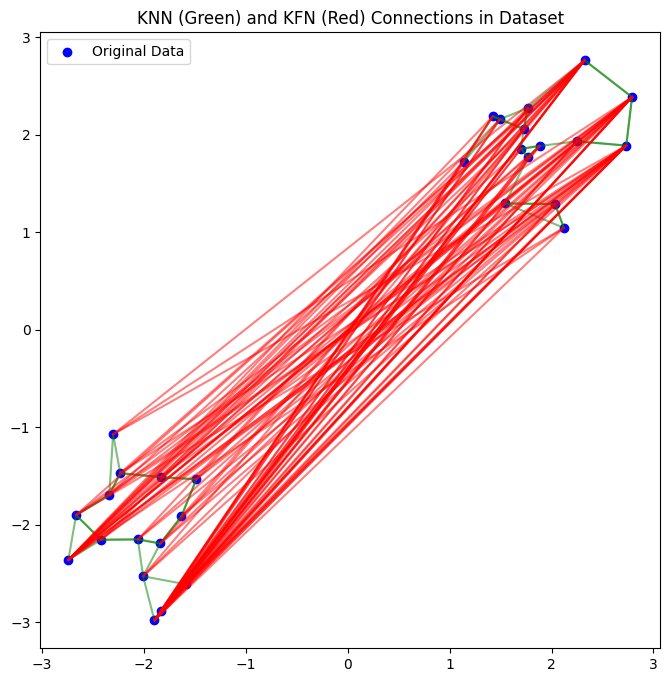

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

# Step 1: Generate a Tiny Dataset (Simple 2D Clusters)
np.random.seed(42)
num_points = 30  # Keep it small for easy visualization
cluster1 = np.random.randn(num_points // 2, 2) * 0.5 + np.array([2, 2])  # Cluster around (2,2)
cluster2 = np.random.randn(num_points // 2, 2) * 0.5 + np.array([-2, -2])  # Cluster around (-2,-2)
dataset = np.vstack([cluster1, cluster2])

# Step 2: Extract K-Nearest Neighbors (KNN) for Local Structure
knn_model = NearestNeighbors(n_neighbors=3)  # Small K to preserve local structure
knn_model.fit(dataset)
knn_distances, knn_indices = knn_model.kneighbors(dataset)

# Step 3: Extract K-Furthest Neighbors (KFN) for Global Structure
def k_furthest_neighbors(dataset, k=3, metric="euclidean"):
    """Finds the K-Furthest Neighbors (KFN) for each point."""
    distances = cdist(dataset, dataset, metric=metric)
    np.fill_diagonal(distances, -np.inf)  # Ignore self-distance
    furthest_indices = np.argsort(distances, axis=1)[:, -k:]  # Get K furthest indices
    return furthest_indices

kfn_indices = k_furthest_neighbors(dataset, k=3)

# Step 4: Visualize Dataset, KNN, and KFN Connections
plt.figure(figsize=(8, 8))
plt.scatter(dataset[:, 0], dataset[:, 1], label="Original Data", color="blue")

# Plot KNN connections (Green)
for i, neighbors in enumerate(knn_indices):
    for n in neighbors:
        plt.plot([dataset[i, 0], dataset[n, 0]], [dataset[i, 1], dataset[n, 1]], 'g-', alpha=0.5)

# Plot KFN connections (Red)
for i, neighbors in enumerate(kfn_indices):
    for n in neighbors:
        plt.plot([dataset[i, 0], dataset[n, 0]], [dataset[i, 1], dataset[n, 1]], 'r-', alpha=0.5)

plt.title("KNN (Green) and KFN (Red) Connections in Dataset")
plt.legend()
plt.show()

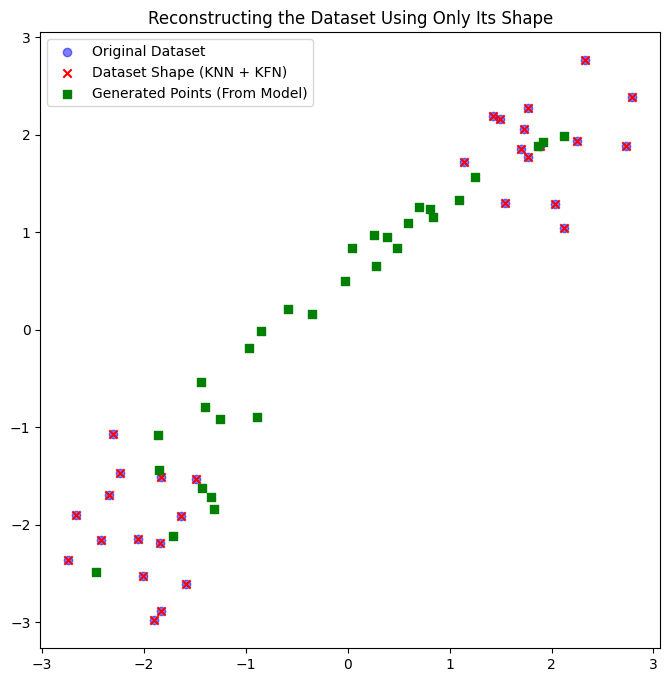

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import cdist

# Step 1: Generate a Tiny 2D Dataset
np.random.seed(42)
num_points = 30
cluster1 = np.random.randn(num_points // 2, 2) * 0.5 + np.array([2, 2])
cluster2 = np.random.randn(num_points // 2, 2) * 0.5 + np.array([-2, -2])
dataset = np.vstack([cluster1, cluster2])

# Step 2: Extract K-Nearest Neighbors (KNN)
knn_model = NearestNeighbors(n_neighbors=3)
knn_model.fit(dataset)
knn_distances, knn_indices = knn_model.kneighbors(dataset)

# Step 3: Extract K-Furthest Neighbors (KFN)
def k_furthest_neighbors(dataset, k=3, metric="euclidean"):
    distances = cdist(dataset, dataset, metric=metric)
    np.fill_diagonal(distances, -np.inf)
    furthest_indices = np.argsort(distances, axis=1)[:, -k:]
    return furthest_indices

kfn_indices = k_furthest_neighbors(dataset, k=3)

# Step 4: Create a "Dataset Shape" Using Only the Extracted KNN + KFN Points
knn_points = np.unique(knn_indices.flatten())
kfn_points = np.unique(kfn_indices.flatten())
shape_indices = np.unique(np.concatenate([knn_points, kfn_points]))
dataset_shape = dataset[shape_indices]

# Step 5: Reduce Dimensionality for Structure Preservation (if needed)
pca = PCA(n_components=2)
dataset_shape_reduced = pca.fit_transform(dataset_shape)

# Step 6: Train a Simple Neural Network on the "Dataset Shape"
X_train = dataset_shape
y_train = dataset_shape

mlp = MLPRegressor(hidden_layer_sizes=(10, 10), max_iter=2000, random_state=42)
mlp.fit(X_train, y_train)

# Step 7: Generate New Data by Sampling from the Model
num_generated = 30
X_test = np.random.uniform(low=dataset_shape.min(axis=0), high=dataset_shape.max(axis=0), size=(num_generated, 2))
y_pred = mlp.predict(X_test)

# Step 8: Plot the Reconstructed Dataset vs. Original Data
plt.figure(figsize=(8, 8))
plt.scatter(dataset[:, 0], dataset[:, 1], label="Original Dataset", color="blue", alpha=0.5)
plt.scatter(dataset_shape[:, 0], dataset_shape[:, 1], label="Dataset Shape (KNN + KFN)", color="red", marker="x")
plt.scatter(y_pred[:, 0], y_pred[:, 1], label="Generated Points (From Model)", color="green", marker="s")

plt.title("Reconstructing the Dataset Using Only Its Shape")
plt.legend()
plt.show()